In [1]:
%matplotlib widget
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ipyfilechooser import FileChooser
import pathlib

import tifffile
from sklearn.preprocessing import minmax_scale

# from pipeline_core import get_stack
from SVD import make_SVD

def norm(a):
    row_sums = a.sum(axis=1)
    new_matrix = a / row_sums[:, np.newaxis]
    return new_matrix
def minmax_norm(data):
    return (data - data.min()) / (data.max() - data.min())

In [2]:
def lines_to_time(max_line_value, ms_per_line, ticks):
    max_seconds_value = max_line_value * ms_per_line
    ticks_labels = np.round(np.linspace(0, max_seconds_value, ticks), 3)
    return ticks_labels

lines_to_time(350, 0.001, 7)

array([0.   , 0.058, 0.117, 0.175, 0.233, 0.292, 0.35 ])

In [3]:
# fs, trig_trace = utilities.file_handling().load_experiment()
choose_object = FileChooser()
def_path = pathlib.Path(r"D:/data_output/")
if def_path.exists() is True:
    choose_object.default_path = r"D:/data_output/"
else:
    choose_object.default_path = pathlib.Path.home()
choose_object.title = "<b>Select experiment object<b>"
choose_object.show_only_dirs = False
choose_object._show_dialog()
display(choose_object)
print("(i.e., the pickled Experiment() file)")

FileChooser(path='D:\data_output', filename='', title='<b>Select experiment object<b>', show_hidden=False, sel…

(i.e., the pickled Experiment() file)


In [4]:
print(choose_object.selected)

None


In [6]:
## Load the file and prime so handy variables
# file_name = r"D:\data_output\trig_line_res\trig_line_res.pickle"
# file_name = r"C:\Users\skrem\Downloads\trig_line_res.pickle"
# file_name = r"C:\Users\Simen\Downloads\recover data\recover data.pickle"
file_name = choose_object.selected

# try: 
with open(file_name, "rb") as input_file:
    obj = pickle.load(input_file)
# except PermissionError:
#     raise FileNotFoundError("You accidentally selected a directory. Please find and select .pickle file.")

pand = obj.panda
experiment_names = obj.names

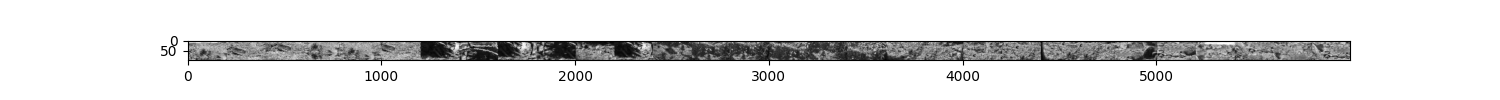

In [7]:
# Get the image file 
import pathlib 
file = pathlib.Path.home().joinpath(r"OneDrive\Universitet\PhD\GitHub repos\Personal-QDSpy-scripts\Display images\test_img_mono.png")
img = plt.imread(file)
plt.figure(figsize = (15, 1))
plt.imshow(img, cmap = 'gray')
def create_image_stack(img, nth_crop):
    num_imgs = img.shape[1] / nth_crop
    arr_list = []
    for i in range(1, int(num_imgs)+1):
        img_segment = img[:, (nth_crop * i)-nth_crop : nth_crop * i]
        arr_list.append(img_segment)
    img_stack = np.array(arr_list)
    return img_stack
def weigth_images(images, weightings):
    if len(images) != len(weightings):
        raise ValueError("Input arrays are not of same lengths")
    weighted_images_list = []
    for img, value in zip(images, weightings):
        weighted_image = img * value
        weighted_images_list.append(weighted_image)
    return weighted_images_list
# weighted_imgs = weigth_images(imgs, weights)
plt.show()
imgs = create_image_stack(img, 200)

In [8]:
pand

0
folder_name                                                nat_mono_4Hz
f_index               [D:\data_output\recover data\nat_mono_4Hz\suit...
fs                    [[-4864.0, -4863.394, -4859.8184, -4863.8184, ...
cell_numbers                                                         66
frame_number                                                       1565
tiff_index            [D:\data_output\recover data\nat_mono_4Hz\nat_...
trig_index            [D:\data_output\recover data\nat_mono_4Hz\nat_...
trigs                 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
iscell_index          [D:\data_output\recover data\nat_mono_4Hz\suit...
iscells               [[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1....
stats_index           [D:\data_output\recover data\nat_mono_4Hz\suit...
stats                 [[{'ypix': [35 35 35 35 35 36 36 36 36 36 36 3...
spks_index            [D:\data_output\recover data\nat_mono_4Hz\suit...
spks                  [[[0.0, 0.0, 3.0249023, 0.0, 2.5014648, 0.0, 0...
ops_index             [D:\data_output\recover data\nat_mono_4Hz\suit...
ops                   [{'suite2p_version': '0.10.3', 'look_one_level...
notes                                                                  
averages                                                           True
mode                                                                 30
line_duration                                                     0.001
x_res                                                               128
y_res                                                                64
trig_frames           [58, 408, 758, 1108, 1458, 1808, 2158, 2508, 2...
num_trigs                                                           270
trig_frames_interval                                         352.048148
trig_secs             [3.712, 26.112000000000002, 48.512, 70.912, 93...
trig_intervals_secs                                           22.531081
f_avgs                [[-4862.601901163046, -4862.594904020832, -486...
f_trials              [[[-4863.450840474784, -4863.441372207108, -48...
trig_trials           [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
trig_avgs             [1.0, 9.866650729623e-312, -4862.332031249999,...

In [105]:
experiment = 0
roi = 34 # 2, 26, 48, 11, 61

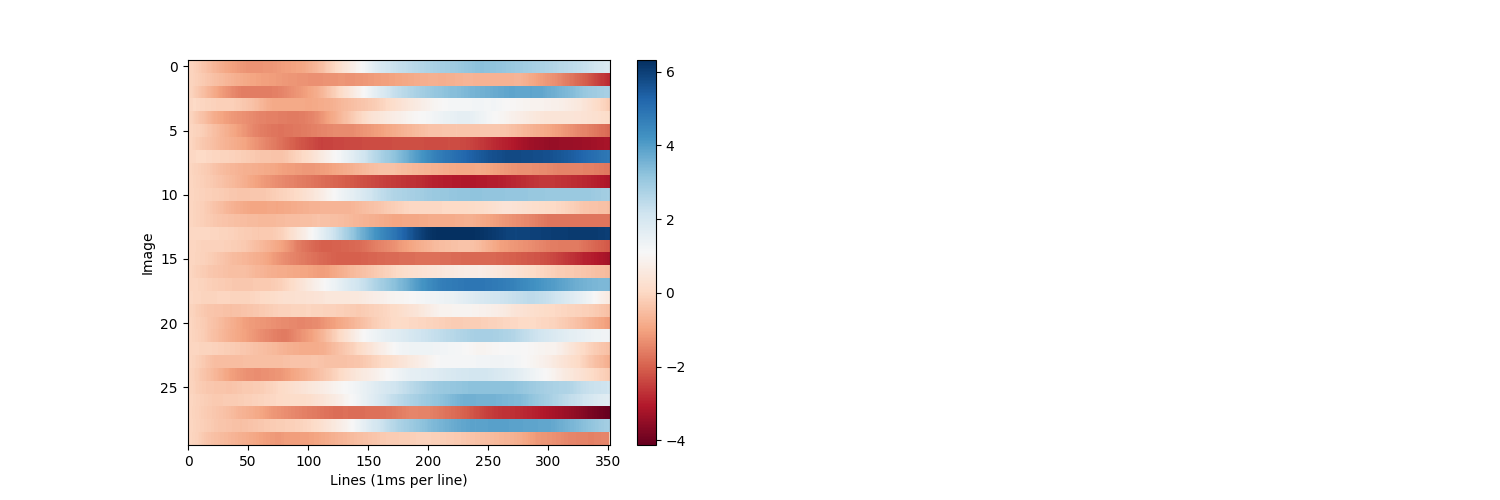

In [106]:
arr = pand.loc["f_avgs"][experiment][roi]
trig = pand.loc["trig_avgs"][experiment]
svd = make_SVD(arr, trig)

fig_init = plt.figure(figsize = (15, 5))
gridspec = fig_init.add_gridspec(1, 2)

show_matrix = fig_init.add_subplot(gridspec[0, 0:1])
the_matrix = show_matrix.imshow((svd.matrix), aspect='auto', interpolation = 'none', cmap = 'RdBu')
fig_init.colorbar(the_matrix, ax = show_matrix) 
show_matrix.set_ylabel("Image")
show_matrix.set_xlabel("Lines (1ms per line)")

# show_weights = fig_init.add_subplot(gridspec[1])
# show_weights.plot(svd.u[:, 0])
# show_weights.plot(svd.weightings, linestyle = 'dashed')
# show_weights.set_xticks(np.arange(0, len(svd.weightings)))

plt.show()
# fig_init.savefig(pathlib.Path.home().joinpath(fr"OneDrive\Universitet\PhD\Conferences\FASEB\FASEB poster\activity_matrix{roi}.svg"))

In [101]:
np.average(svd.matrix)

-0.17633849503838725

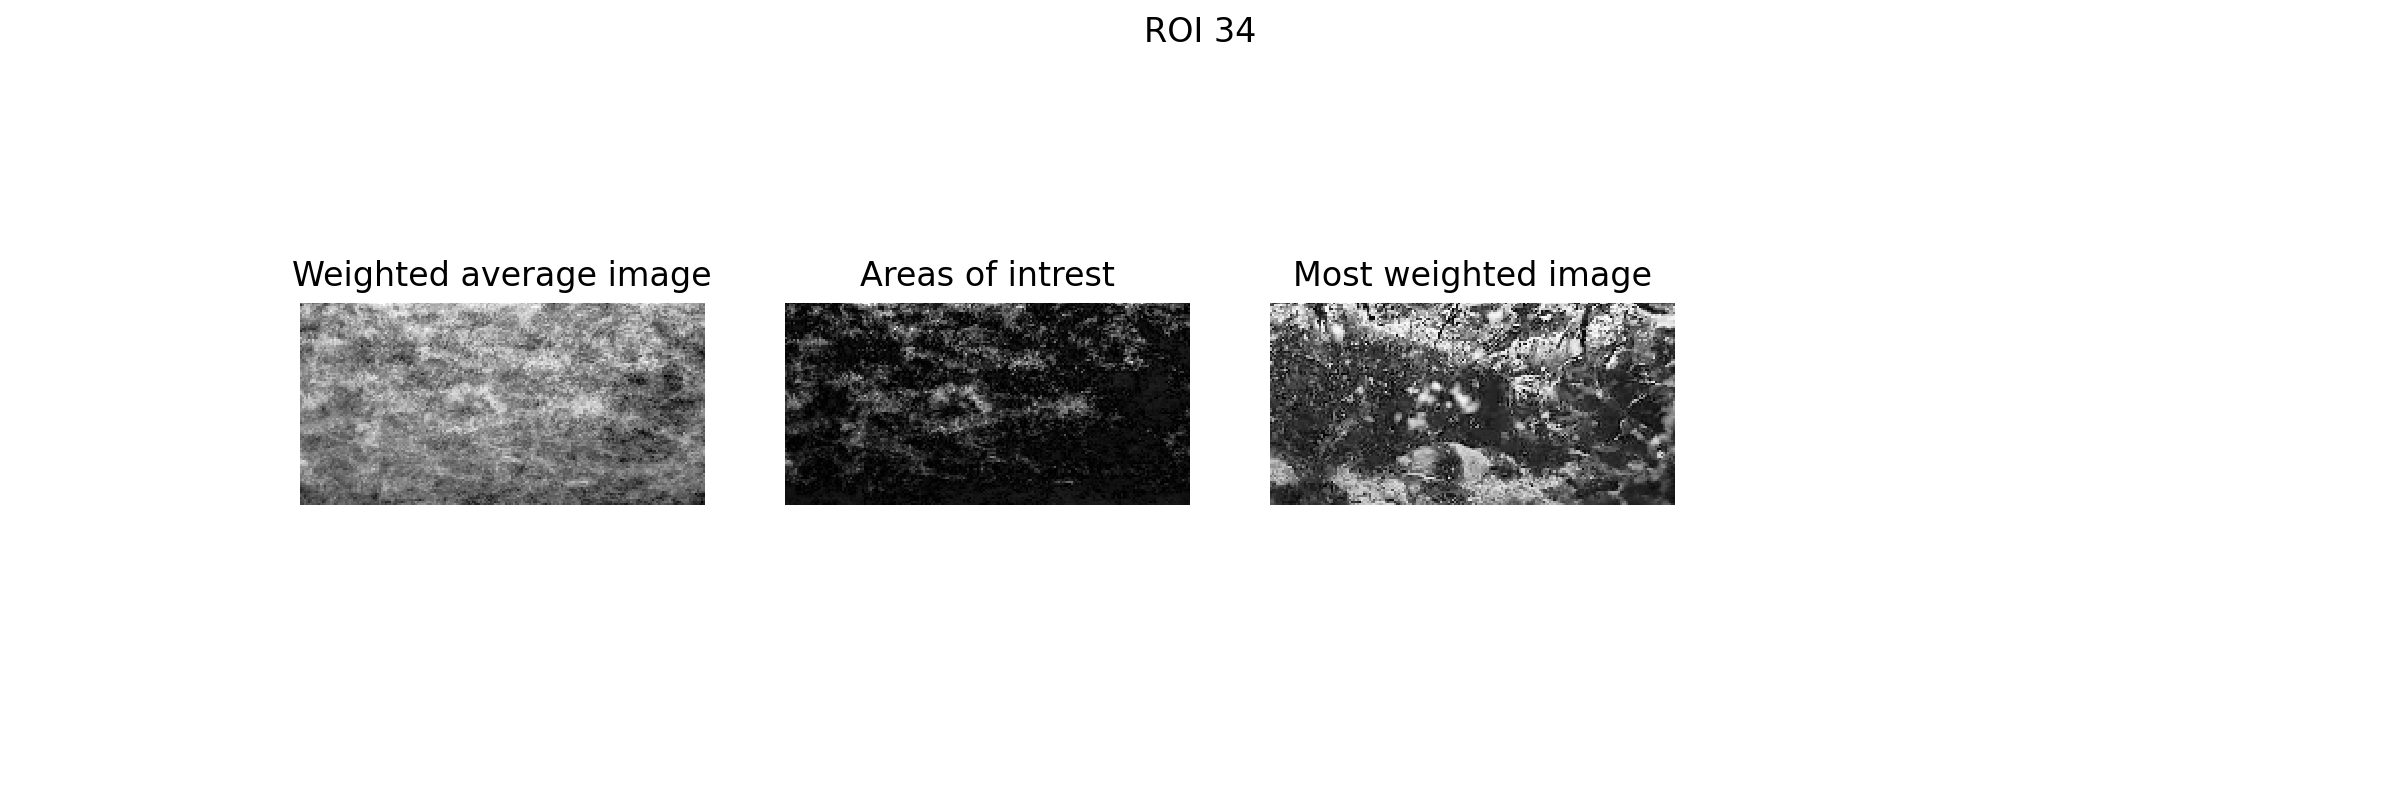

In [107]:
weights =  svd.weightings #svd_raw.weightings
imgs_rep = imgs # np.repeat(imgs, 10, axis = 0)
# weights = np.arange(0, 30)[::-1]
# weights[10] = 1 # Bias the average image towards one image
avg_img_w_weights = np.average(imgs_rep, axis = 0, weights = weights)
# scld_weighted = minmax_scale(avg_img_w_weights.ravel(), feature_range=(-1,1)).reshape(avg_img_w_weights.shape)
avg_img_stack = np.average(imgs_rep, axis = 0)
scld_avg = minmax_scale(avg_img_stack.ravel(), feature_range=(-1,1)).reshape(avg_img_stack.shape)

img_summary = plt.figure(figsize = (12, 4),  dpi = 200)

img_grid = img_summary.add_gridspec(1, 4)

a = img_summary.add_subplot(img_grid[0])
a.imshow(avg_img_w_weights, cmap = 'Greys_r', interpolation = 'none')
a.axis('off')
a.set_title("Weighted average image")

# a2 = img_summary.add_subplot(img_grid[1])
# a2.imshow(avg_img_w_weights / avg_img_stack, cmap = 'gray')
# a2.axis('off')
# a2.set_title("Weighted average image / average image")

sorted_imgs = np.argsort(np.abs(weights), axis = 0)
most_weighted_img = imgs_rep[sorted_imgs[-1]]
# second_weighted_img = imgs_rep[sorted_imgs[-2]]
b = img_summary.add_subplot(img_grid[2])
b.imshow(most_weighted_img, cmap = 'Greys_r', interpolation = 'none')
b.axis('off')
b.set_title(f"Most weighted image") # ({sorted_imgs[-1]})

# c = img_summary.add_subplot(img_grid[2])
# c.imshow(np.abs(avg_img_stack - avg_img_w_weights) *  avg_img_w_weights, cmap = 'Greys_r', alpha = 1, interpolation = 'none')
# c.axis('off')
# c.set_title("|avg - weighted| * weighted")
# # plt.suptitle("Raw F")



d = img_summary.add_subplot(img_grid[1])
d.imshow(np.abs(avg_img_stack - avg_img_w_weights) * avg_img_w_weights, cmap = 'Greys_r', alpha = 1, interpolation = 'none')
d.axis('off')
d.set_title("Areas of intrest")

img_summary.savefig(pathlib.Path.home().joinpath(fr"OneDrive\Universitet\PhD\Conferences\FASEB\FASEB poster\weighted_average{roi}_aaa.svg"))

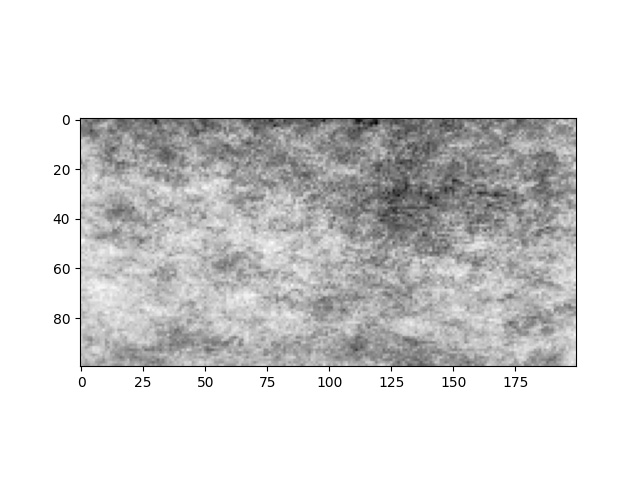

In [94]:
plt.figure()
scl = minmax_scale(avg_img_stack.ravel(), feature_range=(-1,1)).reshape(avg_img_stack.shape)
plt.imshow(scl, cmap = 'Greys')

In [185]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 1, 1, 1])

In [164]:
np.abs(a-b)

array([0, 1, 2, 3])

In [166]:
np.abs(avg_img_stack - avg_img_w_weights)

array([[0.00159976, 0.01136735, 0.01665084, ..., 0.07186178, 0.04107412,
        0.06574194],
       [0.0172011 , 0.00603906, 0.02378698, ..., 0.05848961, 0.05942136,
        0.03133387],
       [0.01524332, 0.00074703, 0.01361085, ..., 0.07129084, 0.06299283,
        0.08848878],
       ...,
       [0.00471083, 0.02505187, 0.03394829, ..., 0.01459206, 0.01295074,
        0.00633413],
       [0.01013068, 0.02504042, 0.00452013, ..., 0.0015705 , 0.02636882,
        0.00611797],
       [0.00286133, 0.01340142, 0.01173078, ..., 0.02661398, 0.00860674,
        0.01587517]])

In [25]:
avg_img_w_weights = np.average(imgs_rep, axis = 0)
plt.imsave(r"C:\Users\SimenLab\Downloads\weighted_avgs_for_Tom.tiff", avg_img_stack, cmap = )

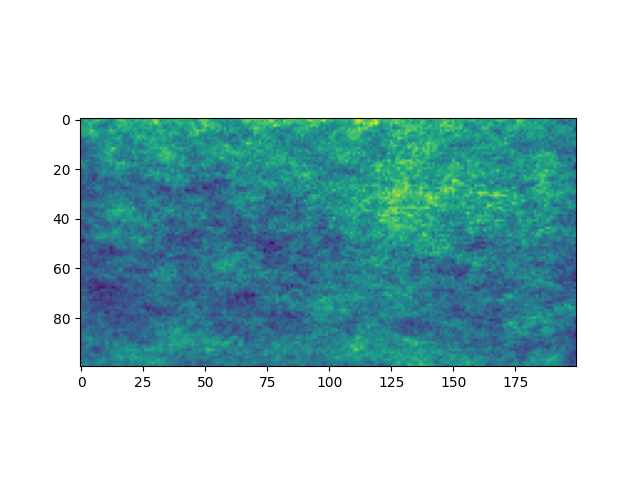

In [127]:
plt.figure()
scaled = minmax_scale(avg_img_stack.ravel(), feature_range=(0,255)).reshape(avg_img_stack.shape)
plt.imshow(avg_img_stack)
tifffile.imwrite(r"C:\Users\SimenLab\Downloads\avg_img.tiff", scaled)

In [118]:
## For saving image stack


from skimage import io
weighted_list = [] 
for i in range(obj.panda.loc["cell_numbers"][0]-1):
    arr = pand.loc["f_avgs"][0][i]
    svd = make_SVD(arr, trig)
    weights = svd.weightings
    avg_img_w_weights = np.average(imgs_rep, axis = 0, weights = weights)
    weighted_imgs_scaled = minmax_scale(avg_img_w_weights.ravel(), feature_range=(0,255)).reshape(avg_img_w_weights.shape)
    weighted_list.append(weighted_imgs_scaled)
weighted_arr = np.array(weighted_list)
# tifffile.imwrite(r"C:\Users\SimenLab\Downloads\weighted_avgs_for_Tom.tiff", weighted_list)

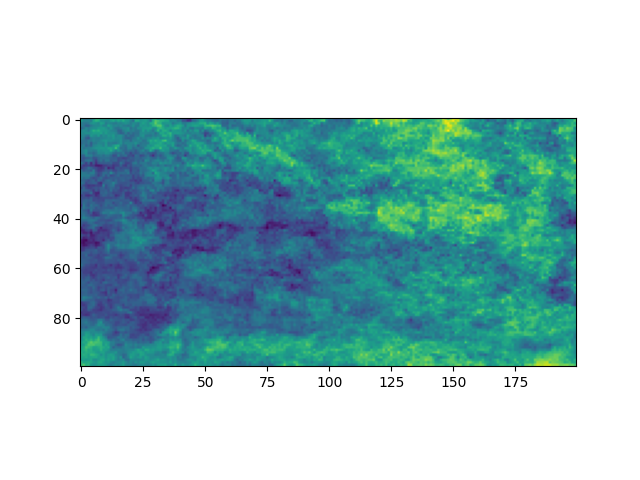

In [119]:
plt.figure()
plt.imshow(weighted_arr[48])

In [109]:
weighted_arr[1]

array([[ 98.99429564, 135.00072718, 136.16233166, ..., 101.34522008,
        115.65562172,  99.13605084],
       [ 81.31059208, 115.67470716, 174.41554488, ..., 108.6391219 ,
        120.86478014,  97.21303278],
       [136.82661395, 168.63230329, 187.8846756 , ..., 125.62443206,
        134.28264751, 136.62876182],
       ...,
       [ 99.70803091, 107.75219387, 127.41537119, ...,  68.03538866,
         59.99488449,  73.63132622],
       [ 99.18522497, 117.43150463, 118.33262462, ...,  54.10279123,
         37.46241525,  66.85897723],
       [ 96.88697946, 102.01739609, 121.03906954, ...,  62.56566565,
         54.19756187,  70.03727506]])

In [97]:
plt.imsave(r"C:\Users\SimenLab\Downloads\weighted_avgs_for_Tom.tiff", weighted_arr[1])

Text(0.4, 0.98, 'SVD reconstruction')

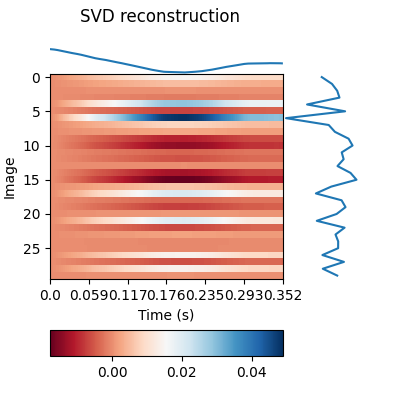

In [84]:
fig2 = plt.figure(figsize = (4, 4))

slots = fig2.add_gridspec(12, 4)

u_x_v = fig2.add_subplot(slots[1:9, 0:3])
arr = u_x_v.imshow(svd.uxv, aspect='auto', interpolation = 'none', cmap = 'RdBu')

u_ = fig2.add_subplot(slots[1:9, 3], sharey = u_x_v)
x = np.arange(len(svd.u[:, 0]))
trace = svd.u[:, 0]
# trace = svd.weightings
u_.plot(trace, x)

uv_ = fig2.add_subplot(slots[0:1, 0:3], sharex = u_x_v)
uv_.plot(svd.uv[0])

# Remove horizontal space between axes
fig2.subplots_adjust(hspace=0, wspace=0)
u_.axis('off')
uv_.axis('off')
u_x_v.set_ylabel("Image")
u_x_v.set_xlabel("Time (s)")
u_x_v.set_xticks(np.linspace(0, svd.uxv.shape[1], 7))
u_x_v.set_xticklabels(lines_to_time(svd.uxv.shape[1], 0.001, 7))

bar = fig2.add_subplot(slots[11, 0:3])
fig2.colorbar(arr, cax = bar, orientation = 'horizontal')
fig2.suptitle("SVD reconstruction", x = 0.4)
# fig2.savefig(pathlib.Path.home().joinpath(fr"OneDrive\Universitet\PhD\Conferences\FASEB\FASEB poster\SVD_reconstruction{roi}.svg"))

In [73]:
np.average(svd.uxv)

-0.0009381807502907066

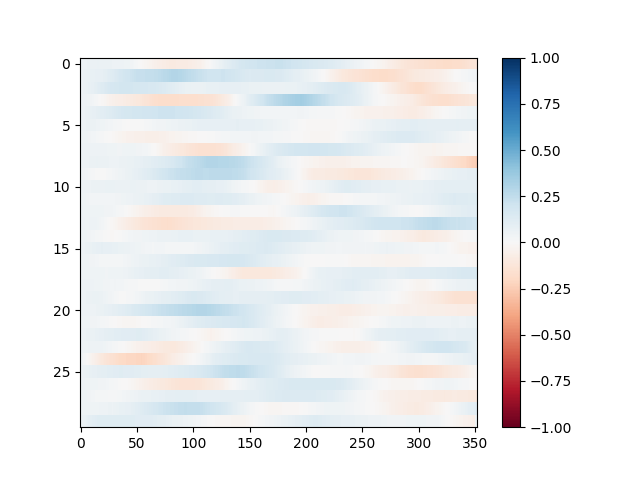

In [81]:
plt.figure()

plt.imshow(minmax_norm(svd.matrix) - minmax_norm(svd.uxv), aspect = 'auto', interpolation = 'none', cmap = 'RdBu')
plt.colorbar()
plt.clim(-1, 1)
plt.savefig(pathlib.Path.home().joinpath(fr"OneDrive\Universitet\PhD\Conferences\FASEB\FASEB poster\SVD_difference{roi}.svg"))

C:\Users\Simen\AppData\Local\Temp\ipykernel_27136\1864898578.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


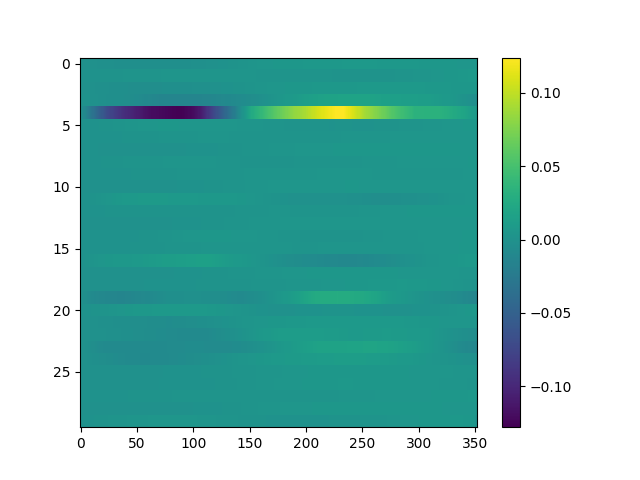

In [73]:
plt.figure()
plt.imshow(norm(svd.matrix), aspect = 'auto', interpolation = 'none')
plt.colorbar()


In [32]:
np.sum(norm(svd.uxv)[0])

0.9999999999999998

In [334]:
2741/50

54.82

Text(0.5, 0.98, 'Avg F')

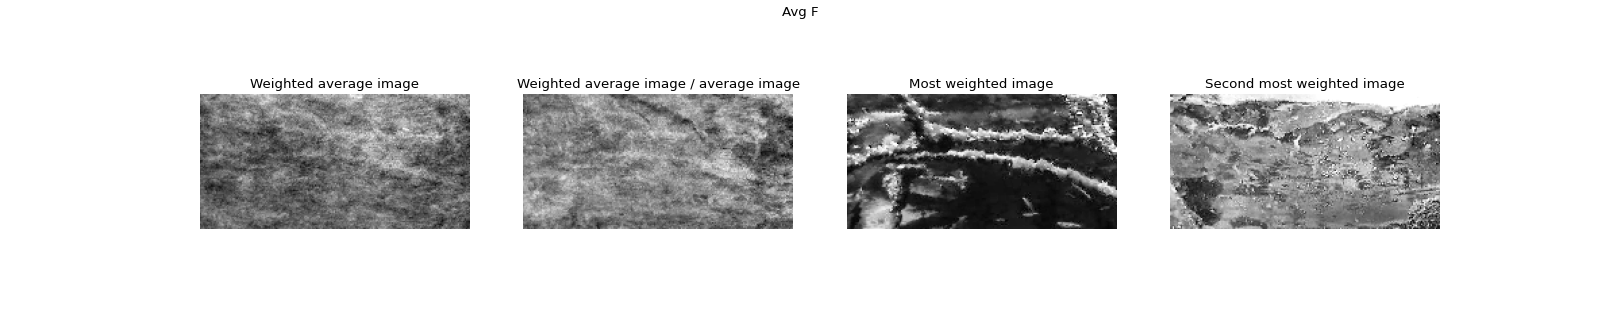

In [62]:
weights = svd.weightings
# weights = np.arange(0, 30)[::-1]
# weights[10] = 1 # Bias the average image towards one image
avg_img_w_weights = np.average(imgs, axis = 0, weights = weights)
avg_img_stack = np.average(imgs, axis = 0)

img_summary = plt.figure(figsize = (20, 4),  dpi = 80)

img_grid = img_summary.add_gridspec(1, 4)

a = img_summary.add_subplot(img_grid[0])
a.imshow(avg_img_w_weights, cmap = 'gray')
a.axis('off')
a.set_title("Weighted average image")

a2 = img_summary.add_subplot(img_grid[1])
a2.imshow(avg_img_w_weights / avg_img_stack, cmap = 'gray')
a2.axis('off')
a2.set_title("Weighted average image / average image")

sorted_imgs = np.argsort(np.abs(weights), axis = 0)
most_weighted_img = imgs[sorted_imgs[-1]]
second_weighted_img = imgs[sorted_imgs[-2]]
b = img_summary.add_subplot(img_grid[2])
b.imshow(most_weighted_img, cmap = 'gray')
b.axis('off')
b.set_title(f"Most weighted image") # ({sorted_imgs[-1]})

c = img_summary.add_subplot(img_grid[3])
c.imshow(second_weighted_img, cmap = 'gray')
c.axis('off')
c.set_title("Second most weighted image")
plt.suptitle("Avg F")

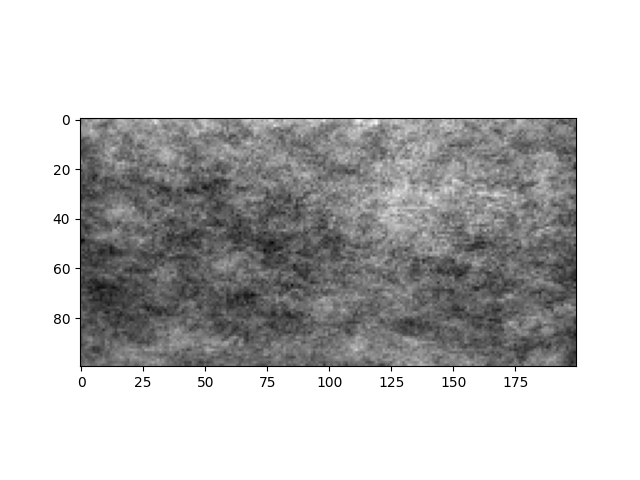

In [63]:
plt.figure()
plt.imshow(np.average(imgs, axis = 0), cmap = 'gray')
plt.show()
plt.axis('off')
plt.savefig(pathlib.Path.home().joinpath(fr"OneDrive\Universitet\PhD\Conferences\FASEB\FASEB poster\avg_img_w_o_weights.svg"))

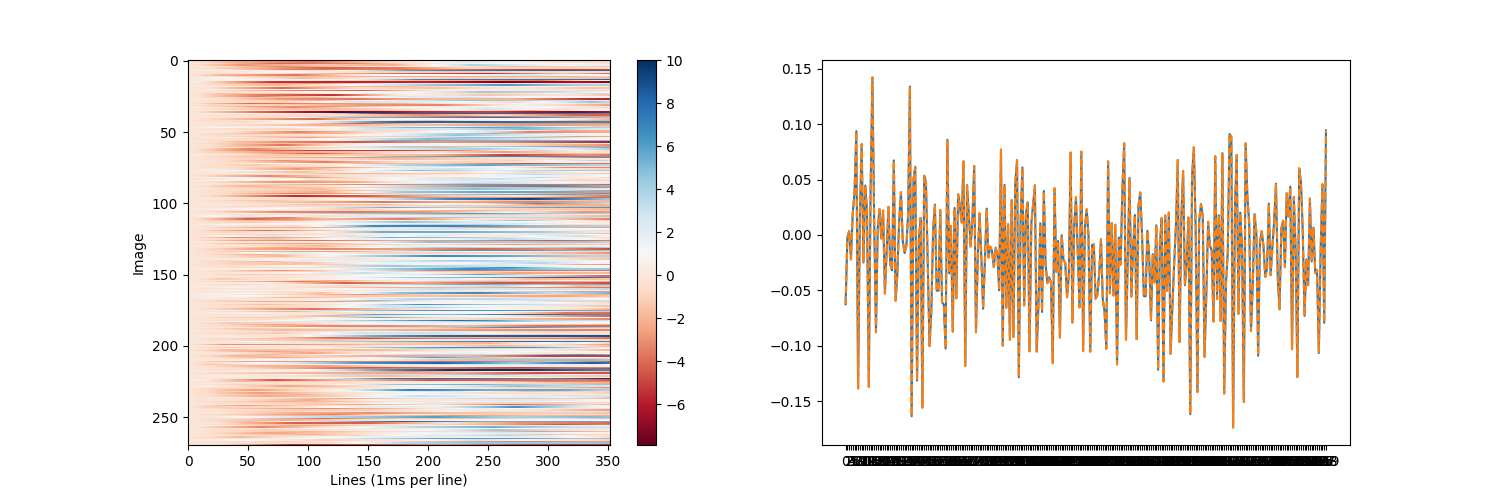

In [242]:
arr = pand.loc["fs"][experiment][roi]
trig = pand.loc["trigs"][experiment]
svd_raw = make_SVD(arr, trig)

fig_init = plt.figure(figsize = (15, 5))
gridspec = fig_init.add_gridspec(1, 2)

show_matrix = fig_init.add_subplot(gridspec[0, 0:1])
the_matrix = show_matrix.imshow(svd_raw.matrix, aspect='auto', interpolation = 'none', cmap = 'RdBu')
fig_init.colorbar(the_matrix, ax = show_matrix) 
show_matrix.set_ylabel("Image")
show_matrix.set_xlabel("Lines (1ms per line)")

show_weights = fig_init.add_subplot(gridspec[1])
show_weights.plot(svd_raw.u[:, 0])
show_weights.plot(svd_raw.weightings, linestyle = 'dashed')
show_weights.set_xticks(np.arange(0, len(svd_raw.weightings)))

plt.show()

### len(pand.loc["trigs"][experiment][0])

In [244]:
## Difference testing
a = np.array([1,2 ,3 ,4])
b = np.array([2,3 , 4, 5,])
np.subtract(b, a)

array([1, 1, 1, 1])

In [26]:
(np.repeat(imgs, 10, axis = 0)).shape

(300, 100, 200)

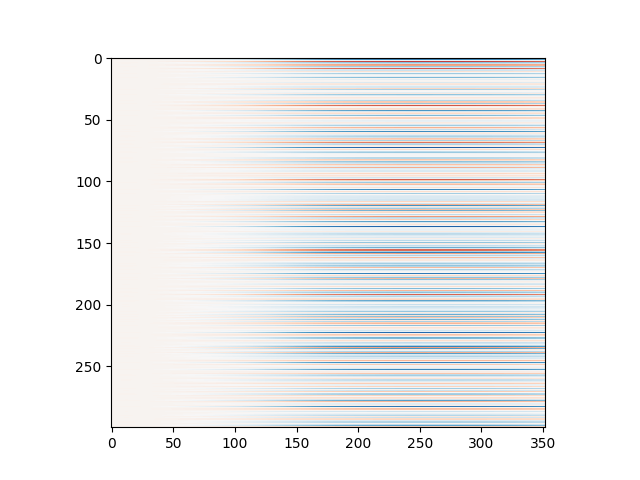

In [18]:
plt.figure()
plt.imshow(svd_raw.uxv, cmap = 'RdBu')


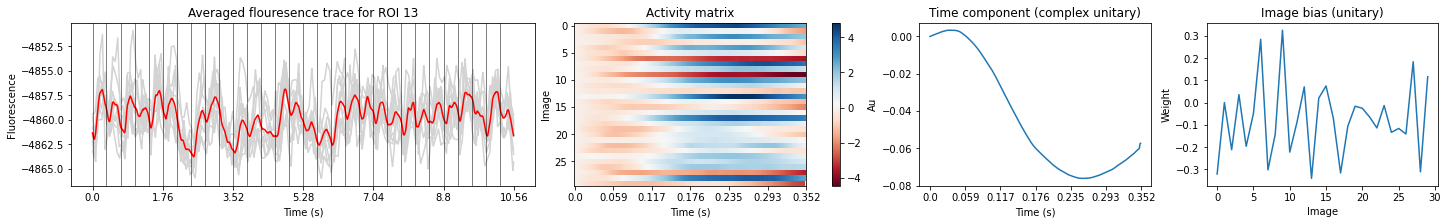

In [17]:
# %matplotlib widget
# Make figure outline 
# fontsize = 20
fig1 = plt.figure(constrained_layout=True, figsize=(20,3))
# Distribute a grid for placing figs by adding gridspec 
grid = fig1.add_gridspec(1, 5)

# go to town
## First row
f_avg = fig1.add_subplot(grid[0, 0:2])
f_avg.set_title(f"Averaged flouresence trace for ROI {roi}")
f_avg.set_xticks(np.linspace(0, len(pand.loc["f_avgs"][experiment][roi]), 7))
f_avg.set_xticklabels(lines_to_time(len(pand.loc["f_avgs"][experiment][roi]), 0.001, 7))
f_avg.set_xlabel('Time (s)')
f_avg.set_ylabel('Fluorescence')
for i in range(int(len(pand.loc["trig_frames"][experiment])/pand.loc["mode"][experiment])):
    f_avg.plot(pand.loc["f_trials"][experiment][i][roi], color = 'lightgrey')
f_avg.plot(pand.loc["f_avgs"][experiment][roi], c = 'r')
for n, i in enumerate(pand.loc["trig_avgs"][experiment]):
    if i == 1:
        f_avg.axvline(n, lw = .5, c = 'black')


activity_segment = fig1.add_subplot(grid[2])
matrix1 = activity_segment.imshow(svd.matrix, aspect='auto', interpolation = 'none', cmap = 'RdBu')
fig1.colorbar(matrix1, ax = activity_segment)
activity_segment.set_title('Activity matrix')
activity_segment.set_xlabel('Time (lines)')
activity_segment.set_xticks(np.linspace(0, svd.uxv.shape[1], 7))
activity_segment.set_xticklabels(lines_to_time(svd.uxv.shape[1], 0.001, 7))
activity_segment.set_xlabel('Time (s)')
activity_segment.set_ylabel('Image')


# uvx = fig1.add_subplot(grid[0, 3])
# matrix2 = uvx.imshow(svd.uxv, aspect='auto', interpolation = 'none', cmap = 'RdBu')
# fig1.colorbar(matrix2, ax = uvx)
# uvx.set_title("SVD reconstruction")
# uvx.set_xticks(np.linspace(0, svd.uxv.shape[1], 7))
# uvx.set_xticklabels(lines_to_time(svd.uxv.shape[1], 0.001, 7))
# uvx.set_xlabel('Time (s)')

## Second row
uv = fig1.add_subplot(grid[3])
uv.plot(svd.uv[0])
uv.set_title("Time component (complex unitary)")
uv.set_xticks(np.linspace(0, svd.uxv.shape[1], 7))
uv.set_xticklabels(lines_to_time(svd.uxv.shape[1], 0.001, 7))
uv.set_xlabel('Time (s)')
uv.set_ylabel('Au')

u = fig1.add_subplot(grid[4])
u.plot(svd.u[:, 0])
u.set_title("Image bias (unitary)")
u.set_xlabel('Image')
u.set_ylabel('Weight')

# avg_img = fig1.add_subplot(grid[1, 0:2])
# avg_img.imshow(avg_img_w_weights - avg_img_stack, cmap = 'gray')
# avg_img.set_title('Weighted average for image')
# avg_img.axis('off')

# fig1.suptitle("Summary for SVD and weighted averaging", fontsize = 20, x = 0.1)
plt.show()
# fig1.savefig(r"C:\Users\skrem\Downloads\overall_summary.png", dpi='figure')

In [274]:
avg_img_stack

array([[0.39398697, 0.38575163, 0.38653594, ..., 0.3971242 , 0.3810458 ,
        0.396732  ],
       [0.38235295, 0.37307188, 0.3667974 , ..., 0.39568627, 0.3785621 ,
        0.38849673],
       [0.37019607, 0.37516335, 0.3664052 , ..., 0.39712423, 0.3942484 ,
        0.376732  ],
       ...,
       [0.2911111 , 0.29150328, 0.34169927, ..., 0.29424837, 0.3001307 ,
        0.31019604],
       [0.2891503 , 0.29411763, 0.29464054, ..., 0.28941172, 0.29464048,
        0.28875816],
       [0.2806536 , 0.29333335, 0.28849676, ..., 0.27555555, 0.2648366 ,
        0.2738562 ]], dtype=float32)

In [275]:
a = np.array([[1, 2, 3],[3,2,1]])
b = np.array([[1, 2, 3],[3,2,1]])
c = a - b
c

array([[0, 0, 0],
       [0, 0, 0]])

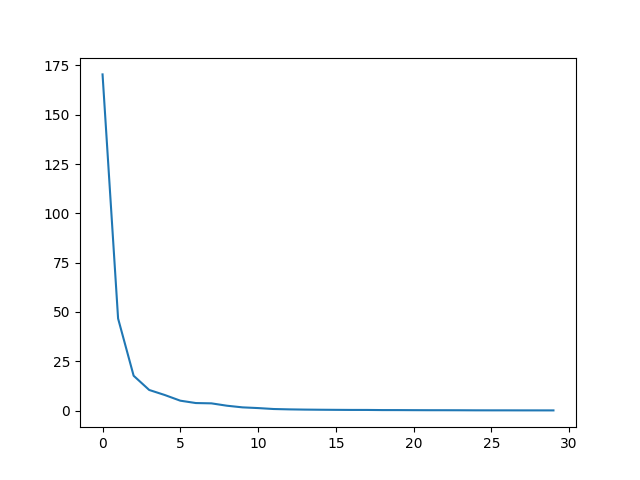

In [53]:
img = 11
plt.figure()
plt.plot(svd.s)
plt.show()


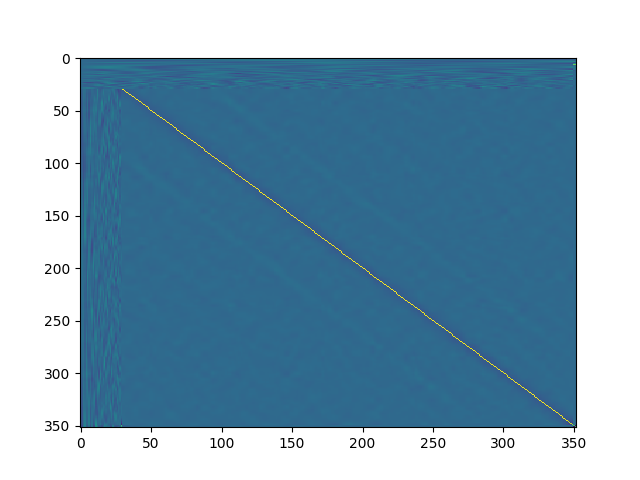

In [54]:
plt.figure()
plt.imshow(svd.uv, aspect='auto', interpolation = 'none')
plt.show()

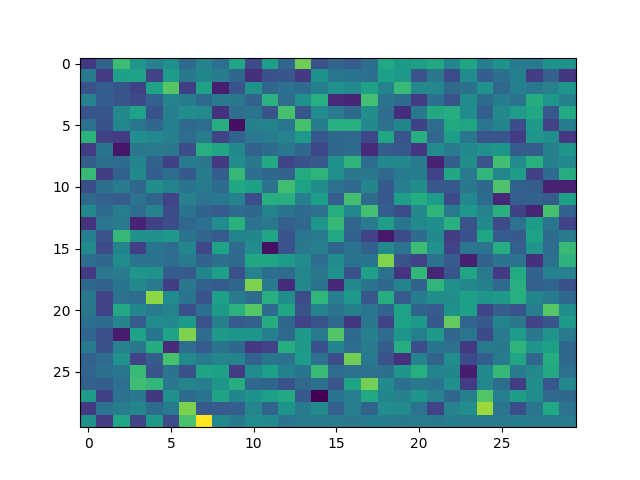

In [55]:
plt.figure()
plt.imshow(svd.u, aspect='auto', interpolation = 'none')
plt.show()

In [ ]:
for i in range(obj.panda.loc["cell_numbers"][0]-1):
    
    arr = pand.loc["f_avgs"][0][i]
    svd = make_SVD(arr, trig)

    weights =  svd.weightings #svd_raw.weightings
    imgs_rep = imgs # np.repeat(imgs, 10, axis = 0)
    # weights = np.arange(0, 30)[::-1]
    # weights[10] = 1 # Bias the average image towards one image
    avg_img_w_weights = np.average(imgs_rep, axis = 0, weights = weights)
    scld_weighted = minmax_scale(avg_img_w_weights.ravel(), feature_range=(-1,1)).reshape(avg_img_w_weights.shape)
    avg_img_stack = np.average(imgs_rep, axis = 0)
    scld_avg = minmax_scale(avg_img_stack.ravel(), feature_range=(-1,1)).reshape(avg_img_stack.shape)

    img_summary = plt.figure(figsize = (12, 4),  dpi = 200)

    img_grid = img_summary.add_gridspec(1, 4)

    a = img_summary.add_subplot(img_grid[0])
    a.imshow(avg_img_w_weights, cmap = 'Greys_r', interpolation = 'none')
    a.axis('off')
    a.set_title("Weighted average image")

    # a2 = img_summary.add_subplot(img_grid[1])
    # a2.imshow(avg_img_w_weights / avg_img_stack, cmap = 'gray')
    # a2.axis('off')
    # a2.set_title("Weighted average image / average image")

    sorted_imgs = np.argsort(np.abs(weights), axis = 0)
    most_weighted_img = imgs_rep[sorted_imgs[-1]]
    # second_weighted_img = imgs_rep[sorted_imgs[-2]]
    b = img_summary.add_subplot(img_grid[1])
    b.imshow(most_weighted_img, cmap = 'Greys_r', interpolation = 'none')
    b.axis('off')
    b.set_title(f"Most weighted image") # ({sorted_imgs[-1]})

    c = img_summary.add_subplot(img_grid[2])
    c.imshow(np.abs(avg_img_stack - avg_img_w_weights) *  avg_img_w_weights, cmap = 'Greys_r', alpha = 1, interpolation = 'none')
    c.axis('off')
    c.set_title("|avg - weighted| * weighted")
    # plt.suptitle("Raw F")

    # img_summary.savefig(pathlib.Path.home().joinpath(fr"OneDrive\Universitet\PhD\Conferences\FASEB\FASEB poster\weighted_average{roi}.svg"))

    d = img_summary.add_subplot(img_grid[3])
    d.imshow(np.abs(avg_img_stack - avg_img_w_weights), cmap = 'Greys_r', alpha = 1, interpolation = 'none')
    d.axis('off')
    d.set_title("|avg - weighted|")
    # plt.suptitle(f"ROI {i}")
